# Tutorial 1

## Outline:
* Jupyter notebooks
* Visualizing univariate and multivariate functions
* Minimization using CG/BFGS 
* Time your function
* Golden section example

## Visualizing univariate and multivariate functions

### Univariate function


In [1]:
# These are some imports generally needed for scientific computing
from pylab import *

# to show figures inline
# to show figures inline
%matplotlib inline 

In [2]:
def func(x):
    f=x**3-3*x+2
    return f


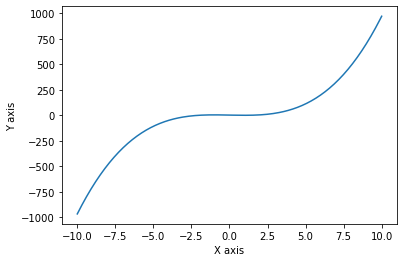

In [3]:
x = np.linspace(-10, 10, 200)
y = func(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
plt.show()

### Multivariate function

I want to know what function $f(x,y)=x^4-x^2+y^2-2xy-2$ looks like. How to do this?

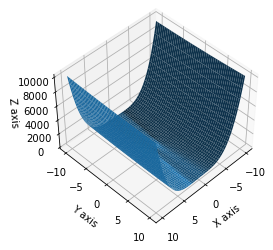

In [4]:
# To plot 3D graphs, you need to use 3D axes
from mpl_toolkits.mplot3d import Axes3D

def func_3d(x,y):
    return x**4 - x**2 + y**2 - 2*x*y -2

x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y)
Z = func_3d(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.view_init(45,45)
plt.show()

## Minimization using CG/BFGS

The multivariate Rosenbrock function is given below:
$f(\vec{x})=\sum_{i=1}^{N-1}100(x_{i+1}-x_i^2)^2+(1-x_i^2)^2$ \
Use x0=np.array([1.3,0.7,0.8,1.9,1.2]) as starting porint and find minimum

In [5]:
from scipy.optimize import minimize

In [6]:
def rosenbrock(x):
    return sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1]**2)**2)

In [7]:
x0=np.array([1.3,0.7,0.8,1.9,1.2])

In [17]:
res = minimize(rosenbrock, x0, method='CG', options={'disp': True, 'gtol': 1e-5})

print("Minimum of the Rosenbrock function:", res.fun)
print("Location of the minimum:", res.x)

         Current function value: 0.000000
         Iterations: 63
         Function evaluations: 900
         Gradient evaluations: 148
Minimum of the Rosenbrock function: 5.7226082478457606e-12
Location of the minimum: [1.00000012 1.00000021 1.00000034 1.00000071 1.00000157]


In [9]:
res = minimize(rosenbrock, x0, method='BFGS', options={'disp': True, 'gtol': 1e-5})

print("Minimum of the Rosenbrock function:", res.fun)
print("Location of the minimum:", res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 150
         Gradient evaluations: 25
Minimum of the Rosenbrock function: 1.3311335204852837e-11
Location of the minimum: [0.9999998  0.9999996  0.99999921 0.99999843 0.99999684]


More on optimization: [Scipy tutorial on optimization](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)

## Time your function
using decorator!

In [10]:
import time

def timeit(f):

    def timed(*args, **kw):

        ts = time.time()
        result = f(*args, **kw)
        te = time.time()

        print('func:%r took: %2.4f sec' % (f.__name__,  te-ts))
        return result

    return timed

In [11]:
@timeit
def timming_BFGS():
    res = minimize(rosenbrock, x0, method='BFGS', options={'disp': True, 'gtol': 1e-5})

    print("Minimum of the Rosenbrock function:", res.fun)
    print("Location of the minimum:", res.x)
    
timming_BFGS()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 150
         Gradient evaluations: 25
Minimum of the Rosenbrock function: 1.3311335204852837e-11
Location of the minimum: [0.9999998  0.9999996  0.99999921 0.99999843 0.99999684]
func:'timming_BFGS' took: 0.0092 sec


In [12]:
@timeit
def timming_CG():
    res = minimize(rosenbrock, x0, method='CG', options={'disp': True, 'gtol': 1e-5})

    print("Minimum of the Rosenbrock function:", res.fun)
    print("Location of the minimum:", res.x)
    
timming_CG()

         Current function value: 0.000000
         Iterations: 63
         Function evaluations: 900
         Gradient evaluations: 148
Minimum of the Rosenbrock function: 5.7226082478457606e-12
Location of the minimum: [1.00000012 1.00000021 1.00000034 1.00000071 1.00000157]
func:'timming_CG' took: 0.0359 sec


## Golden section example

Given the following function, can you find its minimum value in range $[0,9]$ using golden section?

In [13]:
def func(x):
    isarray=type(x) is np.ndarray
    coefs=np.array([8.001371477,
-24.06731415,
37.076044,
0,
-43.86909846,
44.42701101,
-22.0126204,
6.536434989,
-1.248082478,
0.157159012,
-0.012990941,
0.000678657,
-2.03269E-05,
2.66065E-07
])
    base=np.zeros((len(x) if isarray else 1,14))
    for i in range(1,14):
        base[:,i]+=x**i
    result=base.dot(coefs)
    return result if isarray else sum(result)

In [14]:
def golden_section(func,start,end,reference,tol):
    if end - start < tol:
        return {'x': reference, 'y': func(reference)}
    
    if reference - start > end - reference:
        # left part
        new_reference = reference - (reference - start) * 0.618
        
        if func(new_reference) > func(reference):
            return golden_section(func,new_reference,end,reference,tol)
        else:
            return golden_section(func,start,reference,new_reference,tol)
            
    else:
        # right part
        new_reference = end - (end - reference) * 0.618
        
        if func(reference) > func(new_reference):
            return golden_section(func,reference,end,new_reference,tol)
        else:
            return golden_section(func,start,new_reference,reference,tol)
    

In [15]:
golden_section(func,0,9,9*0.618,1e-5)

{'x': 4.9642583966279235, 'y': -11.400276695145294}